# **MNIST classification with TensorFlow model**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, sys

workdir_path = '/content/drive/My Drive/Python/ICA'
os.chdir(workdir_path)
sys.path.append(workdir_path)

Predictions 

In [0]:
import tensorflow as tf
tf.reset_default_graph()
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax

set the basic configurations, load the MNIST database and convert it to the necessary format

In [0]:
# Training Parameters
learning_rate = 0.001
num_steps = 500
batch_size = 128
display_step = 100

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input], name='x_1')
Y = tf.placeholder(tf.float32, [None, num_classes], name='y_1')
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

# load the data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [0]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Construct model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)


# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# Start training
sess = tf.Session()
sess.run(init)
for step in range(1, num_steps+1):
  batch_x, batch_y = mnist.train.next_batch(batch_size)
  # Run optimization op (backprop)
  sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
  if step % display_step == 0 or step == 1:
    # Calculate batch loss and accuracy
    loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                        Y: batch_y,
                                                        keep_prob: 1.0})
    print("Step " + str(step) + ", Minibatch Loss= " + \
      "{:.4f}".format(loss) + ", Training Accuracy= " + \
      "{:.3f}".format(acc))

print("Optimization Finished!")

# Calculate accuracy for 256 MNIST test images
print("Testing Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images[:256], Y: mnist.test.labels[:256], keep_prob: 1.0}))

Step 1, Minibatch Loss= 93385.9219, Training Accuracy= 0.102
Step 100, Minibatch Loss= 1456.6771, Training Accuracy= 0.836
Step 200, Minibatch Loss= 2267.0913, Training Accuracy= 0.852
Step 300, Minibatch Loss= 483.6808, Training Accuracy= 0.961
Step 400, Minibatch Loss= 596.0199, Training Accuracy= 0.930
Step 500, Minibatch Loss= 110.6036, Training Accuracy= 0.977
Optimization Finished!
Testing Accuracy: 0.96875


Predictions 

9804
prediction:  3
real value:  3


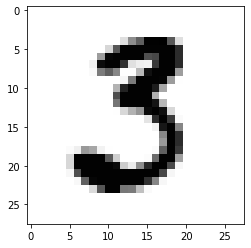

In [0]:
i=randint(1, mnist.test.images.shape[0])
print(i)
plt.imshow(mnist.test.images[i].reshape((28,28)), cmap='Greys')    #  cmap='Greys' to show as greyscale
print("prediction: ", argmax(sess.run(prediction, feed_dict={X: mnist.test.images[i:i+1], keep_prob: 1.0})))
print("real value: ", argmax(mnist.test.labels[i:i+1]))

In [0]:
logits
print(i)

9804


In [0]:
prediction

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

In [0]:
# Save the model
saver = tf.train.Saver()
saver.save(sess,'./tensorflowModel.ckpt')
tf.train.write_graph(sess.graph.as_graph_def(), '.', 'tensorflowModel.pbtxt', as_text=True)

'./tensorflowModel.pbtxt'

In [0]:
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

In [0]:
freeze_graph.freeze_graph('tensorflowModel.pbtxt', "", False, 
                          './tensorflowModel.ckpt', "Softmax",
                           "", "",
                           'frozentensorflowModel.pb', True, ""  
                         )

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./tensorflowModel.ckpt
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


In [0]:
print("input name: ", X.name)
print("output name: ", prediction.name)
print("input name: ", Y.name)

input name:  x_1:0
output name:  Softmax:0
input name:  y_1:0


In [0]:
inputGraph = tf.GraphDef()
with tf.gfile.Open('frozentensorflowModel.pb', "rb") as f:
  data2read = f.read()
  inputGraph.ParseFromString(data2read)
  
outputGraph = optimize_for_inference_lib.optimize_for_inference(
              inputGraph,
              ["x_1"], # an array of the input node(s)
              ["Softmax"], # an array of output nodes
              tf.int32.as_datatype_enum)

# Save the optimized graph'test.pb'
f = tf.gfile.FastGFile('OptimizedGraph1.pb', "w")
f.write(outputGraph.SerializeToString()) 

In [0]:
from google.colab import files
files.download('/content/drive/My Drive/Python/ICA/frozentensorflowModel.pb')


In [0]:
sess = tf.Session()
graph = tf.get_default_graph()
with graph.as_default():
    with sess.as_default():
        #restoring the model
        saver = tf.train.import_meta_graph('tensorflowModel.ckpt.meta')
        saver.restore(sess,tf.train.latest_checkpoint('./'))

INFO:tensorflow:Restoring parameters from ./tensorflowModel.ckpt


In [0]:
import tensorflow as tf
gf = tf.GraphDef()
gf.ParseFromString(open('frozentensorflowModel.pb','rb').read())
[n.name + '=>' +  n.op for n in gf.node if n.op in ( 'Softmax','Placeholder')]

['x_1=>Placeholder', 'Placeholder=>Placeholder', 'Softmax=>Softmax']

In [0]:
X

<tf.Tensor 'x_1:0' shape=(?, 784) dtype=float32>

In [0]:
sess = tf.Session()
graph = tf.get_default_graph()
# with graph.as_default():
with sess.as_default():
    #restoring the model
    saver = tf.train.import_meta_graph('tensorflowModel.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    #initializing all variables
    sess.run(tf.global_variables_initializer())
    
    #using the model for prediction
    x_tensor = graph.get_tensor_by_name("x_1:0")
    #keep_prob is not always necessary it depends on your model
    ##keep_prob = graph.get_tensor_by_name("dropout_keep_prob:0")
    op_to_restore = graph.get_tensor_by_name("Softmax:0")
    feed_dict={x_tensor: X}
    
    opt = []
    
    opt = sess.run(op_to_restore ,feed_dict)
    
    Y = np.asarray(y_test)# converting list to numpy array
    labels=np.argmax(y_test, 1)
    predictions=np.argmax(opt,1)
    count =  np.sum(labels == predictions)
    print("Number of correct prediction %d out of %d"%(count,len(predictions)))
    print("Accuracy is {:.3f}". format(float(count)/len(predictions)))

INFO:tensorflow:Restoring parameters from ./tensorflowModel.ckpt


TypeError: ignored

In [0]:
import tensorflow as tf

def load_graph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def, name="prefix")
    return graph

In [0]:

import argparse 
import tensorflow as tf

if __name__ == '__main__':


    # We use our "load_graph" function
    graph = load_graph('frozentensorflowModel.pb')

    with graph.as_default():
      # We can verify that we can access the list of operations in the graph
      for op in graph.get_operations():
          print(op.name)
          # prefix/Placeholder/inputs_placeholder
          # ...
          # prefix/Accuracy/predictions
          
      # We access the input and output nodes 
      x = graph.get_tensor_by_name('prefix/x_1:0')
      y = graph.get_tensor_by_name('prefix/y_1:0')
          
      # We launch a Session
      with tf.Session(graph=graph) as sess:
          # Note: we don't nee to initialize/restore anything
          # There is no Variables in this graph, only hardcoded constants 
          print("")
          print("*********************************************")
          print("")
  #        y_out = sess.run(y, feed_dict={
  #            x: mnist.test.images[:256] # < 45
  #        })
          #sess.run(accuracy, feed_dict={X: mnist.test.images[:256], Y: mnist.test.labels[:256], keep_prob: 1.0})
          # I taught a neural net to recognise when a sum of numbers is bigger than 45
          # it should return False in this case
  #        print(y_out) # [[ False ]] Yay, it works!

          j=randint(1, mnist.test.images.shape[0])
          print(i)
          #plt.imshow(mnist.test.images[j].reshape((28,28)), cmap='Greys')    #  cmap='Greys' to show as greyscale
          print("prediction: ", argmax(sess.run(y, feed_dict={x: mnist.test.images[j:j+1], keep_prob: 1.0})))
          print("real value: ", argmax(mnist.test.labels[j:j+1]))

prefix/Placeholder
prefix/Placeholder_2
prefix/Variable
prefix/Variable/read
prefix/Variable_1
prefix/Variable_1/read
prefix/Variable_2
prefix/Variable_2/read
prefix/Variable_3
prefix/Variable_3/read
prefix/Variable_4
prefix/Variable_4/read
prefix/Variable_5
prefix/Variable_5/read
prefix/Variable_6
prefix/Variable_6/read
prefix/Variable_7
prefix/Variable_7/read
prefix/Reshape/shape
prefix/Reshape
prefix/Conv2D
prefix/BiasAdd
prefix/Relu
prefix/MaxPool
prefix/Conv2D_1
prefix/BiasAdd_1
prefix/Relu_1
prefix/MaxPool_1
prefix/Reshape_1/shape
prefix/Reshape_1
prefix/MatMul
prefix/Add
prefix/Relu_2
prefix/sub/x
prefix/sub
prefix/dropout/Shape
prefix/dropout/random_uniform/min
prefix/dropout/random_uniform/max
prefix/dropout/random_uniform/RandomUniform
prefix/dropout/random_uniform/sub
prefix/dropout/random_uniform/mul
prefix/dropout/random_uniform
prefix/dropout/sub/x
prefix/dropout/sub
prefix/dropout/truediv/x
prefix/dropout/truediv
prefix/dropout/GreaterEqual
prefix/dropout/mul
prefix/drop

TypeError: ignored

In [0]:
x

<tf.Tensor 'prefix/Placeholder:0' shape=(?, 784) dtype=float32>